### Question 1 [Data Preparation]

##### Q1.1

In [1]:
#載入套件
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
pd.set_option("display.max_rows", 1000)    #設定最大能顯示1000rows
pd.set_option("display.max_columns", 1000) #設定最大能顯示1000columns

In [4]:
stu_adm = pd.read_csv('student_admission106.csv', encoding="utf-8", dtype=str)
uname = pd.read_csv('univ_name106short1.csv', encoding="utf-8", dtype=str)

all_depid = stu_adm['department_id'].unique()
all_stuid = stu_adm['student_id'].unique()

ndepid = all_depid.shape[0]
nstuid = all_stuid.shape[0]
print("There are %d students and %d departments in total." % (nstuid, ndepid))

print("offers received by students:")
stu_adm=stu_adm.drop(['state'],axis=1)
stu_adm

There are 60461 students and 1976 departments in total.
offers received by students:


school_id department_id student_id student_name location1 location2
0            001        001012   10246842          黃士玹        南部      台南考區
1            001        001012   10042237          黃冠婷        北部      台北考區
2            001        001012   10008031          鍾大方        北部      台北考區
3            001        001012   10201525          曾信豪        中部      彰化考區
4            001        001012   10014615          陳品儒        北部      台北考區
...          ...           ...        ...          ...       ...       ...
181262       151        151022   10277940         None        南部      高雄考區
181263       151        151022   10279214         None        南部      高雄考區
181264       151        151022   10291919          陳詠舜        南部      屏東考區
181265       151        151022   10300601          胡昱凡        東部      花蓮考區
181266       151        151022   19310303         None        北部      桃園考區

[181267 rows x 6 columns]

In [5]:
print("academic department basic information:")
uname

academic department basic information:


year school_id department_id school_name department_name category_id  \
0     106       006        006042      國立政治大學            教育學系           1   
1     106       006        006052      國立政治大學       教育學系(公費生)           1   
2     106       006        006062      國立政治大學    教育學系(原住民公費生)           1   
3     106       006        006022      國立政治大學            歷史學系           2   
4     106       006        006152      國立政治大學            民族學系           2   
...   ...       ...           ...         ...             ...         ...   
1996  106       099        099212      國立臺北大學           飛鳶組招生          99   
1997  106       108        108182        慈濟大學     不分系招生(新芽A組)          99   
1998  106       108        108192        慈濟大學     不分系招生(新芽B組)          99   
1999  106       108        108202        慈濟大學     不分系招生(新芽C組)          99   
2000  106       112        112062        康寧大學    企業管理學系(臺南校區)          99   

     category_name school_name_abbr department_name_abbr  
0               教育               政大                   教育  
1               教育               政大                教育(公)  
2               教育               政大              教育(原住民)  
3            藝術及人文               政大                   歷史  
4            藝術及人文               政大                  民族學  
...            ...              ...                  ...  
1996            其他               臺北                  飛鳶組  
1997            其他               慈濟              不分系(新A)  
1998            其他               慈濟              不分系(新B)  
1999            其他               慈濟              不分系(新C)  
2000            其他               康寧               企管(臺南)  

[2001 rows x 9 columns]

In [6]:
data=stu_adm[['student_id','department_id']]

In [7]:
def remove_data(data):
    
    for i in range(10):
    
        # Get the count of each value
        value_counts = data['department_id'].value_counts()

        # Select the values where the count is less than 10
        to_remove = value_counts[value_counts < 10].index

        # Keep rows where the department_id column is not in to_remove
        data = data[~data.department_id.isin(to_remove)]

        print('remove department',len(to_remove),'row')

        # Get the count of each value
        value_counts_2 = data['student_id'].value_counts()

        # Select the values where the count is less than 2
        to_remove_2 = value_counts_2[value_counts_2 < 2 ].index

        # Keep rows where the student_id column is not in to_remove
        data = data[~data.student_id.isin(to_remove_2)]

        print('remove student',len(to_remove_2),'row')
    
    
    return data
    

In [8]:
#刪除不符合題目規定的資料
data=remove_data(data)

remove department 45 row
remove student 13005 row
remove department 13 row
remove student 32 row
remove department 1 row
remove student 0 row
remove department 0 row
remove student 0 row
remove department 0 row
remove student 0 row
remove department 0 row
remove student 0 row
remove department 0 row
remove student 0 row
remove department 0 row
remove student 0 row
remove department 0 row
remove student 0 row
remove department 0 row
remove student 0 row


In [9]:
data=data.groupby(['department_id'])['student_id'].value_counts().unstack().fillna(0)

In [10]:
data = data.rename_axis(None, axis=1)

In [11]:
data=data.reset_index()
data

department_id  10000101  10000110  10000111  10000112  10000114  \
0           001012       0.0       0.0       0.0       0.0       0.0   
1           001022       0.0       0.0       0.0       0.0       0.0   
2           001032       0.0       0.0       0.0       0.0       0.0   
3           001042       0.0       0.0       0.0       0.0       0.0   
4           001052       0.0       0.0       0.0       0.0       0.0   
...            ...       ...       ...       ...       ...       ...   
1912        153142       0.0       0.0       0.0       0.0       0.0   
1913        153152       0.0       0.0       0.0       0.0       0.0   
1914        153162       0.0       0.0       0.0       0.0       0.0   
1915        153172       0.0       0.0       0.0       0.0       0.0   
1916        153182       0.0       0.0       0.0       0.0       0.0   

      10000116  10000120  10000121  10000125  10000126  10000129  10000133  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1912       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1913       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1914       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1915       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1916       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      10000138  10000139  10000141  10000201  10000209  10000216  10000217  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1912       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1913       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1914       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1915       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1916       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      10000219  10000224  10000226  10000227  10000229  10000230  10000240  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...        ...       ...       ...       ...       ...       ...       ...   
1912       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1913       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1914       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1915       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1916       0.0       0.0       0.0       0.0       0.0       0.0       0.0   

      10000304  10000310  10000312  10000313  10000315  10000317  10000325  \
0          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
3          0.0   

the number of academic departments is 1917

the number of student applicants is 47386

之後跑模型時 會將 department_id 放到 index 再跑模型

##### Q1.2

In [12]:
data_setindex=data.set_index('department_id')

In [13]:
data_rank=pd.DataFrame(np.sum(data_setindex,axis=1)).reset_index()

In [14]:
data_rank=data_rank.sort_values([0], ascending=False).head(10).reset_index(drop=True)

In [15]:
data_rank=data_rank.rename(columns={0:"student"})

In [16]:
#Report the top ten departments that received the most applications and the number of applications they received
data_rank.merge(uname[['department_id','school_name','department_name']])

department_id  student school_name department_name
0        008122    386.0        中原大學          機械工程學系
1        012052    376.0      中國醫藥大學             藥學系
2        046032    367.0        銘傳大學      會計學系（臺北校區）
3        004382    357.0      國立成功大學          電機工程學系
4        008112    353.0        中原大學          土木工程學系
5        005192    353.0        東吳大學          企業管理學系
6        005182    351.0        東吳大學            會計學系
7        015342    340.0        逢甲大學          財務金融學系
8        045012    339.0        義守大學          電機工程學系
9        015222    329.0        逢甲大學          資訊工程學系

### Question 2 [Explore]

##### Q2.1

In [17]:
from sklearn.decomposition import PCA

In [18]:
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(data_setindex)

In [19]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4',  
                         'principal component 5', 'principal component 6','principal component 7', 'principal component 8'])

In [20]:
principalDf

principal component 1  principal component 2  principal component 3  \
0                 -0.031360              -0.011692              -0.184515   
1                  0.196053              -0.012183              -0.248202   
2                 -0.037037              -0.012257              -0.210749   
3                  0.004384              -0.019182              -0.168307   
4                 -0.014930              -0.001425              -0.155650   
...                     ...                    ...                    ...   
1912              -0.076438              -0.008202              -0.121296   
1913              -0.086831              -0.010328              -0.138037   
1914              -0.093790              -0.010625              -0.133890   
1915              -0.086460              -0.010873              -0.080528   
1916              -0.050078              -0.003567              -0.110609   

      principal component 4  principal component 5  principal component 6  \
0                 -0.038826               0.095820              -0.034045   
1                 -0.070233               0.129231               0.004341   
2                 -0.058000               0.086324              -0.015887   
3                 -0.051683               0.059378              -0.009100   
4                 -0.032940               0.075463              -0.024232   
...                     ...                    ...                    ...   
1912              -0.061256               0.047022               0.024274   
1913              -0.071210              -0.060614              -0.040717   
1914               0.019761              -0.156555              -0.018762   
1915              -0.081962              -0.047064              -0.040495   
1916              -0.023559               0.048392               0.006914   

      principal component 7  principal component 8  
0                 -0.093525               0.000620  
1                 -0.220021              -0.183386  
2                 -0.097390              -0.034282  
3                 -0.091156               0.014601  
4                 -0.080531               0.012392  
...                     ...                    ...  
1912              -0.125255               0.029930  
1913              -0.064191               0.021949  
1914              -0.034470               0.041129  
1915              -0.022427               0.064877  
1916              -0.061108               0.021619  

[1917 rows x 8 columns]

In [21]:
finalDf = pd.concat([principalDf, data[['department_id']]], axis = 1)

In [22]:
finalDf=finalDf.merge(uname[['department_id','school_name','department_name','category_name']])
finalDf

principal component 1  principal component 2  principal component 3  \
0                 -0.031360              -0.011692              -0.184515   
1                  0.196053              -0.012183              -0.248202   
2                 -0.037037              -0.012257              -0.210749   
3                  0.004384              -0.019182              -0.168307   
4                 -0.014930              -0.001425              -0.155650   
...                     ...                    ...                    ...   
1912              -0.076438              -0.008202              -0.121296   
1913              -0.086831              -0.010328              -0.138037   
1914              -0.093790              -0.010625              -0.133890   
1915              -0.086460              -0.010873              -0.080528   
1916              -0.050078              -0.003567              -0.110609   

      principal component 4  principal component 5  principal component 6  \
0                 -0.038826               0.095820              -0.034045   
1                 -0.070233               0.129231               0.004341   
2                 -0.058000               0.086324              -0.015887   
3                 -0.051683               0.059378              -0.009100   
4                 -0.032940               0.075463              -0.024232   
...                     ...                    ...                    ...   
1912              -0.061256               0.047022               0.024274   
1913              -0.071210              -0.060614              -0.040717   
1914               0.019761              -0.156555              -0.018762   
1915              -0.081962              -0.047064              -0.040495   
1916              -0.023559               0.048392               0.006914   

      principal component 7  principal component 8 department_id school_name  \
0                 -0.093525               0.000620        001012      國立臺灣大學   
1                 -0.220021              -0.183386        001022      國立臺灣大學   
2                 -0.097390              -0.034282        001032      國立臺灣大學   
3                 -0.091156               0.014601        001042      國立臺灣大學   
4                 -0.080531               0.012392        001052      國立臺灣大學   
...                     ...                    ...           ...         ...   
1912              -0.125255               0.029930        153142      國立金門大學   
1913              -0.064191               0.021949        153152      國立金門大學   
1914              -0.034470               0.041129        153162      國立金門大學   
1915              -0.022427               0.064877        153172      國立金門大學   
1916              -0.061108               0.021619        153182      國立金門大學   

     department_name category_name  
0              中國文學系         藝術及人文  
1             外國語文學系         藝術及人文  
2               歷史學系         藝術及人文  
3                哲學系         藝術及人文  
4               人類學系         藝術及人文  
...              ...           ...  
1912            護理學系     醫藥衛生及社會福利  
1913          長期照護學系     醫藥衛生及社會福利  
1914          社會工作學系     醫藥衛生及社會福利  
1915       都市計畫與景觀學系      工程、製造及營建  
1916       護理學系(公費生)     醫藥衛生及社會福利  

[1917 rows x 12 columns]

In [23]:
finalDf['category_name'].unique()

array(['藝術及人文', '社會科學、新聞學及圖書資訊', '自然科學、數學及統計', '醫藥衛生及社會福利', '工程、製造及營建',
       '農業、林業、漁業及獸醫', '商業、管理及法律', '資訊通訊科技', '教育', '其他', '服務'],
      dtype=object)

In [125]:
#在資料夾裡面放入微軟正黑體 讓視覺化結果可以顯示中文
import matplotlib.font_manager as mfm
font_path = "./simhei.ttf"
prop = mfm.FontProperties(fname = font_path)

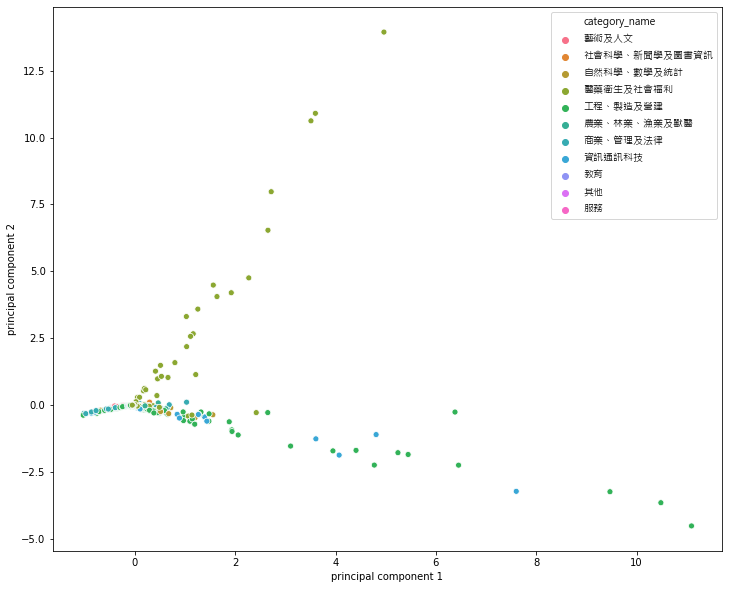

In [25]:
#Visualize academic departments using the first eight principal components
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='principal component 1',y='principal component 2',hue='category_name',
           data=finalDf)
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

ax.legend(prop=prop,loc='upper right')
plt.show()

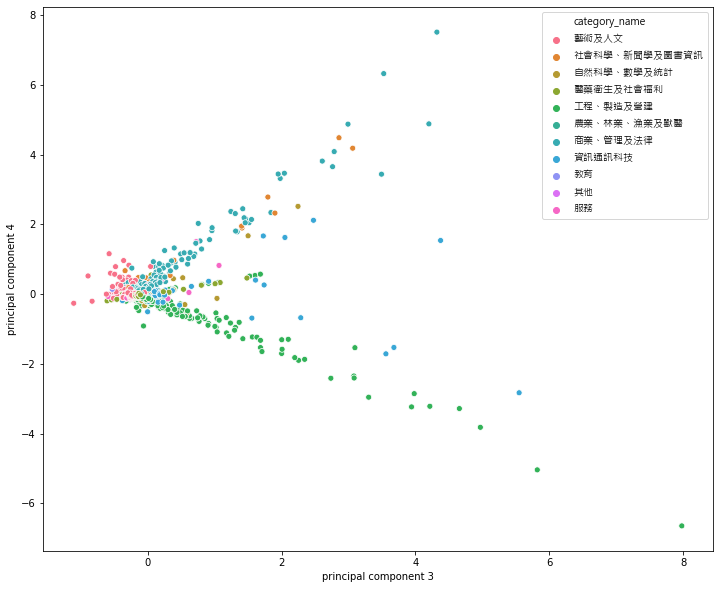

In [26]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='principal component 3',y='principal component 4',hue='category_name',
           data=finalDf)
plt.xlabel('principal component 3')
plt.ylabel('principal component 4')

ax.legend(prop=prop,loc='upper right')
plt.show()

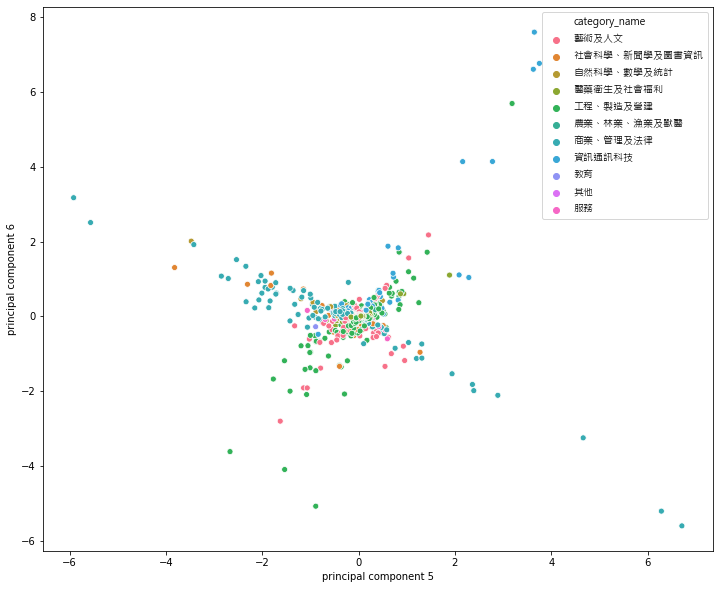

In [27]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='principal component 5',y='principal component 6',hue='category_name',
           data=finalDf)
plt.xlabel('principal component 5')
plt.ylabel('principal component 6')

ax.legend(prop=prop,loc='upper right')
plt.show()

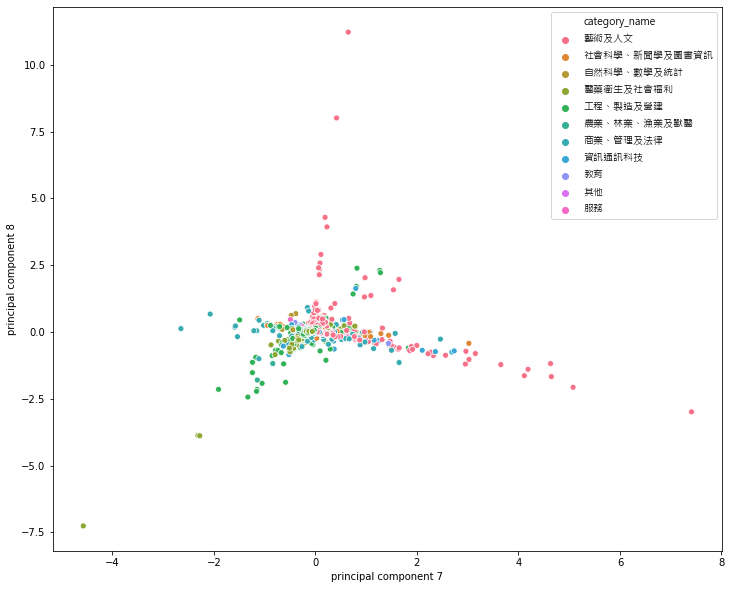

In [28]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='principal component 7',y='principal component 8',hue='category_name',
           data=finalDf)
plt.xlabel('principal component 7')
plt.ylabel('principal component 8')

ax.legend(prop=prop,loc='upper right')
plt.show()

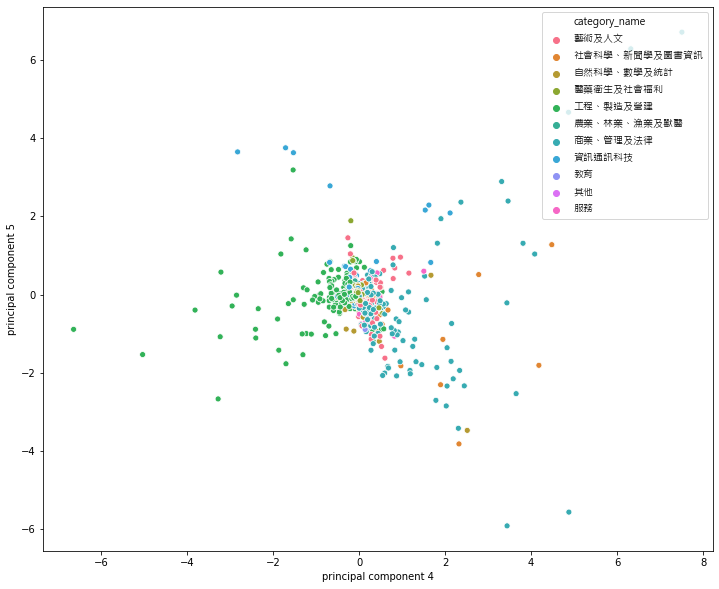

In [29]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='principal component 4',y='principal component 5',hue='category_name',
           data=finalDf)
plt.xlabel('principal component 4')
plt.ylabel('principal component 5')

ax.legend(prop=prop,loc='upper right')
plt.show()

分別跑完multiple pairs of principal components to visualize

最後我選擇principal component 4 and 5 再跑一次

因為他們的變異數較大 較能視覺化詮釋資料

可以看見 工程製造管理、商業管理法律、藝術人文 這三大類在PCA中最能被分群出來視覺化

##### Q2.2

In [30]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)

In [31]:
MDS= embedding.fit_transform(data_setindex)
MDS.shape

(1917, 2)

In [32]:
MDSDf = pd.DataFrame(data = MDS , columns = ['MDS 1', 'MDS 2'])

In [33]:
MDSDf=pd.concat([MDSDf, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])

In [34]:
MDSDf

MDS 1     MDS 2 department_id school_name department_name  \
0     5.365761  2.132930        001012      國立臺灣大學           中國文學系   
1    -8.548469  7.202771        001022      國立臺灣大學          外國語文學系   
2     7.610419 -0.801701        001032      國立臺灣大學            歷史學系   
3    -4.719852  1.898517        001042      國立臺灣大學             哲學系   
4     1.842098 -2.033654        001052      國立臺灣大學            人類學系   
...        ...       ...           ...         ...             ...   
1912 -1.042596 -6.845576        153142      國立金門大學            護理學系   
1913 -5.347271 -5.974565        153152      國立金門大學          長期照護學系   
1914 -7.816683 -3.269354        153162      國立金門大學          社會工作學系   
1915 -6.486947 -1.184639        153172      國立金門大學       都市計畫與景觀學系   
1916  0.139789  0.195094        153182      國立金門大學       護理學系(公費生)   

     category_name  
0            藝術及人文  
1            藝術及人文  
2            藝術及人文  
3            藝術及人文  
4            藝術及人文  
...            ...  
1912     醫藥衛生及社會福利  
1913     醫藥衛生及社會福利  
1914     醫藥衛生及社會福利  
1915      工程、製造及營建  
1916     醫藥衛生及社會福利  

[1917 rows x 6 columns]

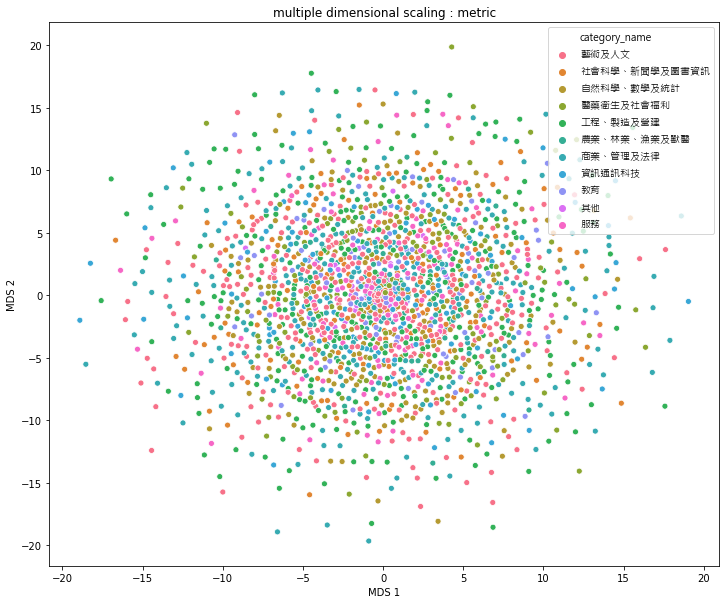

In [35]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='MDS 1',y='MDS 2',hue='category_name',
           data=MDSDf)
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('multiple dimensional scaling : metric')
ax.legend(prop=prop,loc='upper right')
plt.show()

In [36]:
from sklearn.manifold import MDS
embedding_2 = MDS(n_components=2,metric=False)
MDS_2= embedding_2.fit_transform(data_setindex)
MDS_2.shape

(1917, 2)

In [37]:
MDSDf_2 = pd.DataFrame(data = MDS_2 , columns = ['MDS 1', 'MDS 2'])
MDSDf_2=pd.concat([MDSDf_2, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])

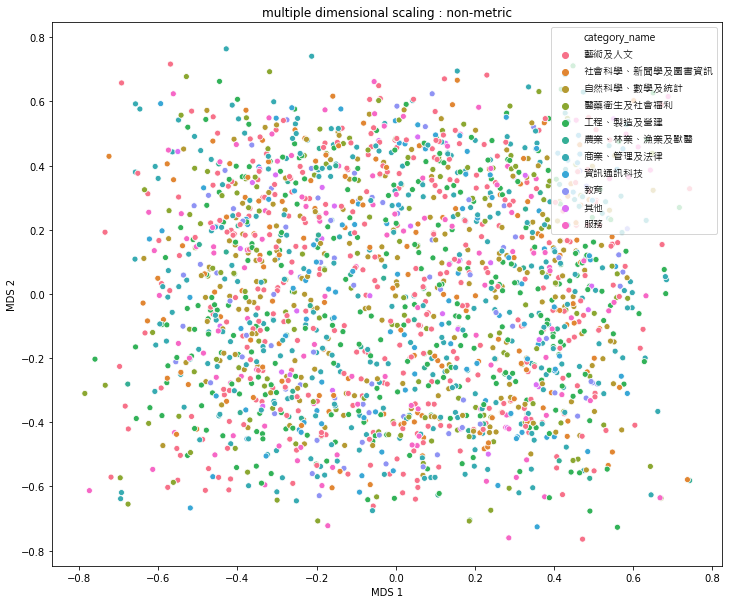

In [38]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='MDS 1',y='MDS 2',hue='category_name',
           data=MDSDf_2)
plt.xlabel('MDS 1')
plt.ylabel('MDS 2')
plt.title('multiple dimensional scaling : non-metric')
ax.legend(prop=prop,loc='upper right')
plt.show()

Visualize academic departments using multiple dimensional scaling. 

We can clearly see that both the metric and non-metric settings perform not well.

##### Q2.3

In [39]:
from sklearn.manifold import LocallyLinearEmbedding

In [40]:
#case1
embedding_3 = LocallyLinearEmbedding(n_components=2,n_neighbors=20)
LLE1= embedding_3.fit_transform(data_setindex)
LLE1.shape

(1917, 2)

In [41]:
LLEDf1 = pd.DataFrame(data = LLE1 , columns = ['LLE 1', 'LLE 2'])
LLEDf1 = pd.concat([LLEDf1, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])

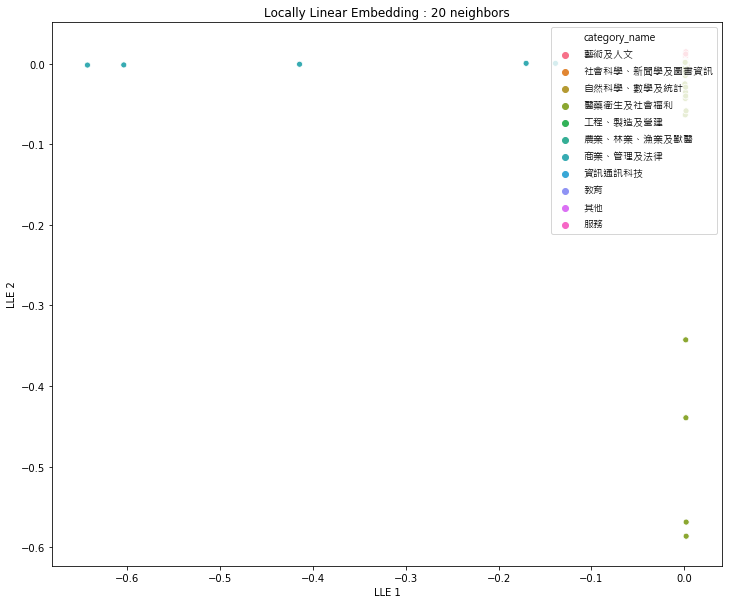

In [42]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='LLE 1',y='LLE 2',hue='category_name',
           data=LLEDf1)
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.title('Locally Linear Embedding : 20 neighbors')
ax.legend(prop=prop,loc='upper right')
plt.show()

In [43]:
#case2
embedding_4 = LocallyLinearEmbedding(n_components=2,n_neighbors=40)
LLE2= embedding_4.fit_transform(data_setindex)
LLE2.shape

(1917, 2)

In [44]:
LLEDf2 = pd.DataFrame(data = LLE2 , columns = ['LLE 1', 'LLE 2'])
LLEDf2 = pd.concat([LLEDf2, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])

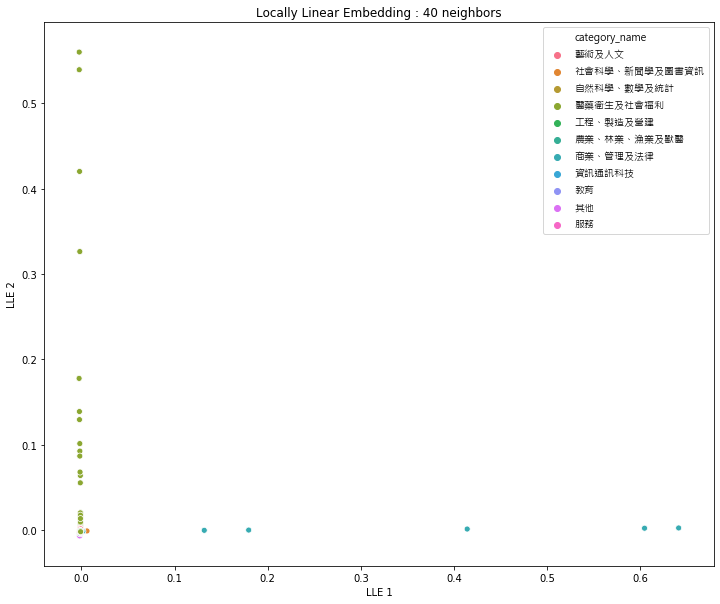

In [45]:
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='LLE 1',y='LLE 2',hue='category_name',
           data=LLEDf2)
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.title('Locally Linear Embedding : 40 neighbors')
ax.legend(prop=prop,loc='upper right')
plt.show()

In [46]:
#case3

In [47]:
pca_2 = PCA(n_components=100)
principalComponents_2 = pca_2.fit_transform(data_setindex)

In [48]:
principalComponents_2.shape

(1917, 100)

In [49]:
embedding_5 = LocallyLinearEmbedding(n_components=2,n_neighbors=20)
LLE3= embedding_5.fit_transform(principalComponents_2)
LLE3.shape

(1917, 2)

In [50]:
LLEDf3 = pd.DataFrame(data = LLE3 , columns = ['LLE 1', 'LLE 2'])
LLEDf3 = pd.concat([LLEDf3, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])

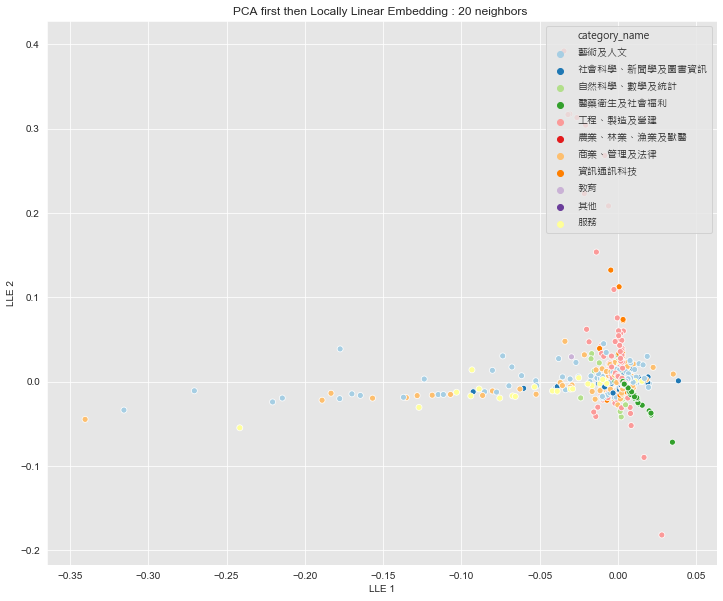

In [51]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='LLE 1',y='LLE 2',hue='category_name', palette="Paired",
           data=LLEDf3)
plt.xlabel('LLE 1')
plt.ylabel('LLE 2')
plt.title('PCA first then Locally Linear Embedding : 20 neighbors ')
ax.legend(prop=prop,loc='upper right')
plt.show()

Visualize academic departments using Locally Linear Embedding.

We can clearly see that both the LLE 20 neighbors and LLE 40 neighbors settings perform not well.

PCA first and then LLE 20 neighbors performs better. (dim is still too low to discover insight)

##### Q2.4

In [52]:
from sklearn.decomposition import KernelPCA

In [53]:
#RBF
pca_3 = KernelPCA(n_components=2, kernel="rbf")
principalComponents_3 = pca_3.fit_transform(data_setindex)
principalComponents_3.shape

(1917, 2)

In [54]:
PCADF = pd.DataFrame(data = principalComponents_3 , columns = ['PCA 1', 'PCA 2'])
PCADF = pd.concat([PCADF, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])


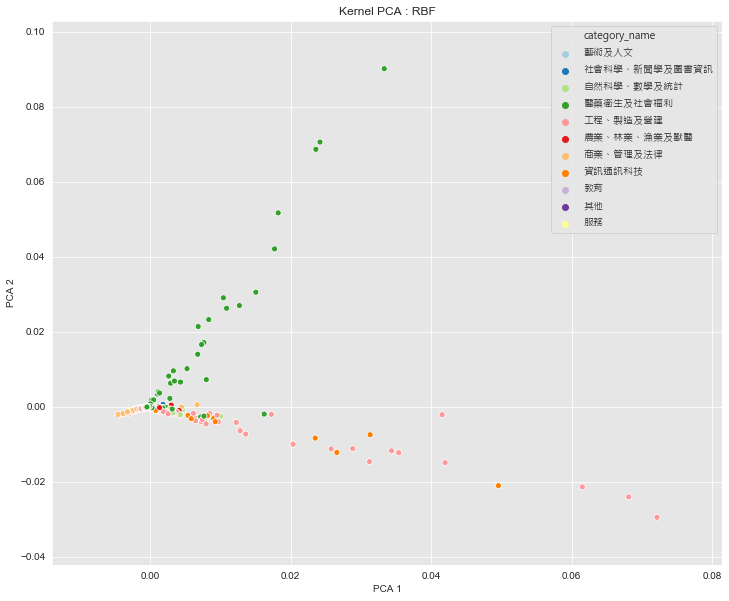

In [55]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='PCA 1',y='PCA 2',hue='category_name', palette="Paired",
           data=PCADF)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Kernel PCA : RBF')
ax.legend(prop=prop,loc='upper right')
plt.show()

In [56]:
#Cosine kernel
pca_4 = KernelPCA(n_components=2, kernel="cosine")
principalComponents_4 = pca_4.fit_transform(data_setindex)
principalComponents_4.shape

(1917, 2)

In [57]:
PCADF2 = pd.DataFrame(data = principalComponents_4 , columns = ['PCA 1', 'PCA 2'])
PCADF2 = pd.concat([PCADF2, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])


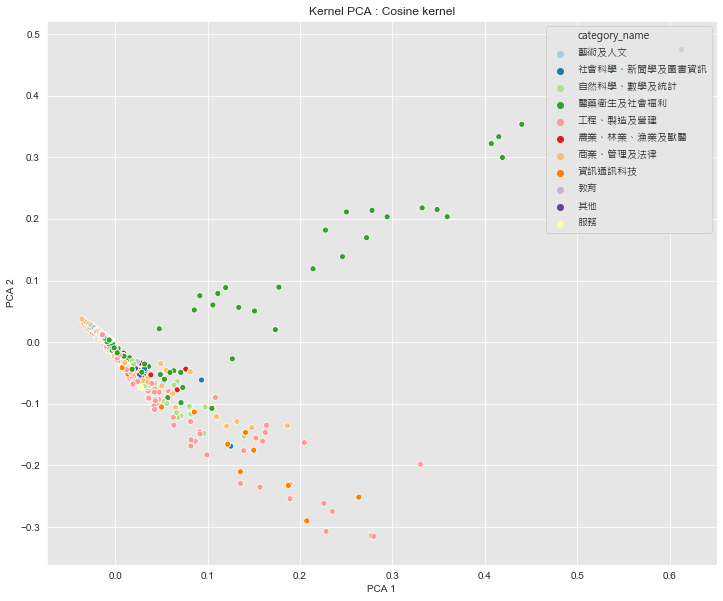

In [58]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='PCA 1',y='PCA 2',hue='category_name', palette="Paired",
           data=PCADF2)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Kernel PCA : Cosine kernel')
ax.legend(prop=prop,loc='upper right')
plt.show()

Visualize academic departments using Kernel PCA.

We can clearly see that both the RBF and Cosine kernel settings perform not well. Most of them are like PCA.

##### Q2.5

In [59]:
from sklearn.manifold import TSNE

In [60]:
#case1
TSNE1 = TSNE(n_components=2,metric="euclidean",random_state=123).fit_transform(data_setindex)
TSNE1.shape

(1917, 2)

In [61]:
TSNEDF1 = pd.DataFrame(data = TSNE1 , columns = ['TSNE 1', 'TSNE 2'])
TSNEDF1 = pd.concat([TSNEDF1, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])


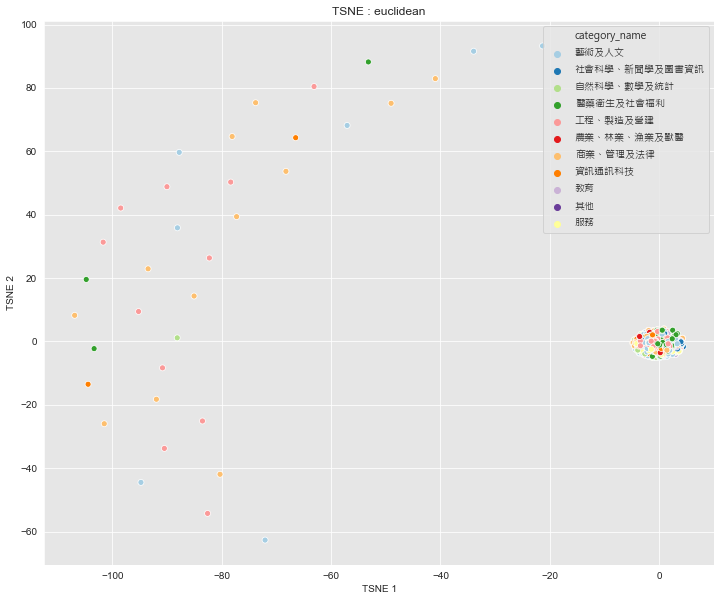

In [62]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='TSNE 1',y='TSNE 2',hue='category_name', palette="Paired",
           data=TSNEDF1)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE : euclidean')
ax.legend(prop=prop,loc='upper right')
plt.show()

In [63]:
#case2
TSNE2 = TSNE(n_components=2,metric="cosine",random_state=123,perplexity=15).fit_transform(data_setindex)
TSNE2.shape

(1917, 2)

In [64]:
TSNEDF2 = pd.DataFrame(data = TSNE2 , columns = ['TSNE 1', 'TSNE 2'])
TSNEDF2 = pd.concat([TSNEDF2, data[['department_id']]], axis = 1).merge(uname)


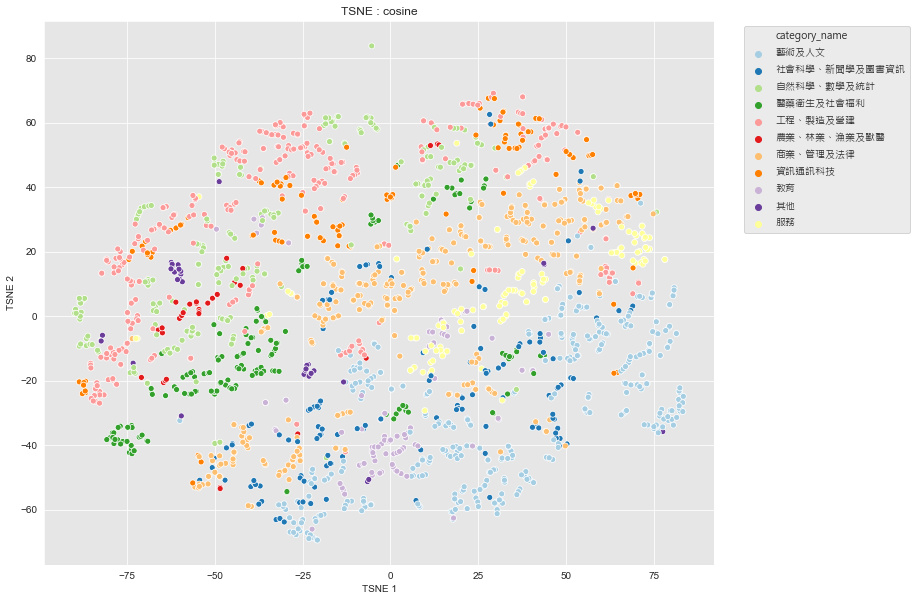

In [65]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='TSNE 1',y='TSNE 2',hue='category_name', palette="Paired",
           data=TSNEDF2)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE : cosine')
ax.legend(prop=prop,loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

In [66]:
#case3
TSNE3 = TSNE(n_components=2,metric="jaccard",random_state=123,perplexity=15).fit_transform(data_setindex)
TSNE3.shape

(1917, 2)

In [67]:
TSNEDF3 = pd.DataFrame(data = TSNE3 , columns = ['TSNE 1', 'TSNE 2'])
TSNEDF3 = pd.concat([TSNEDF3, data[['department_id']]], axis = 1).merge(uname)


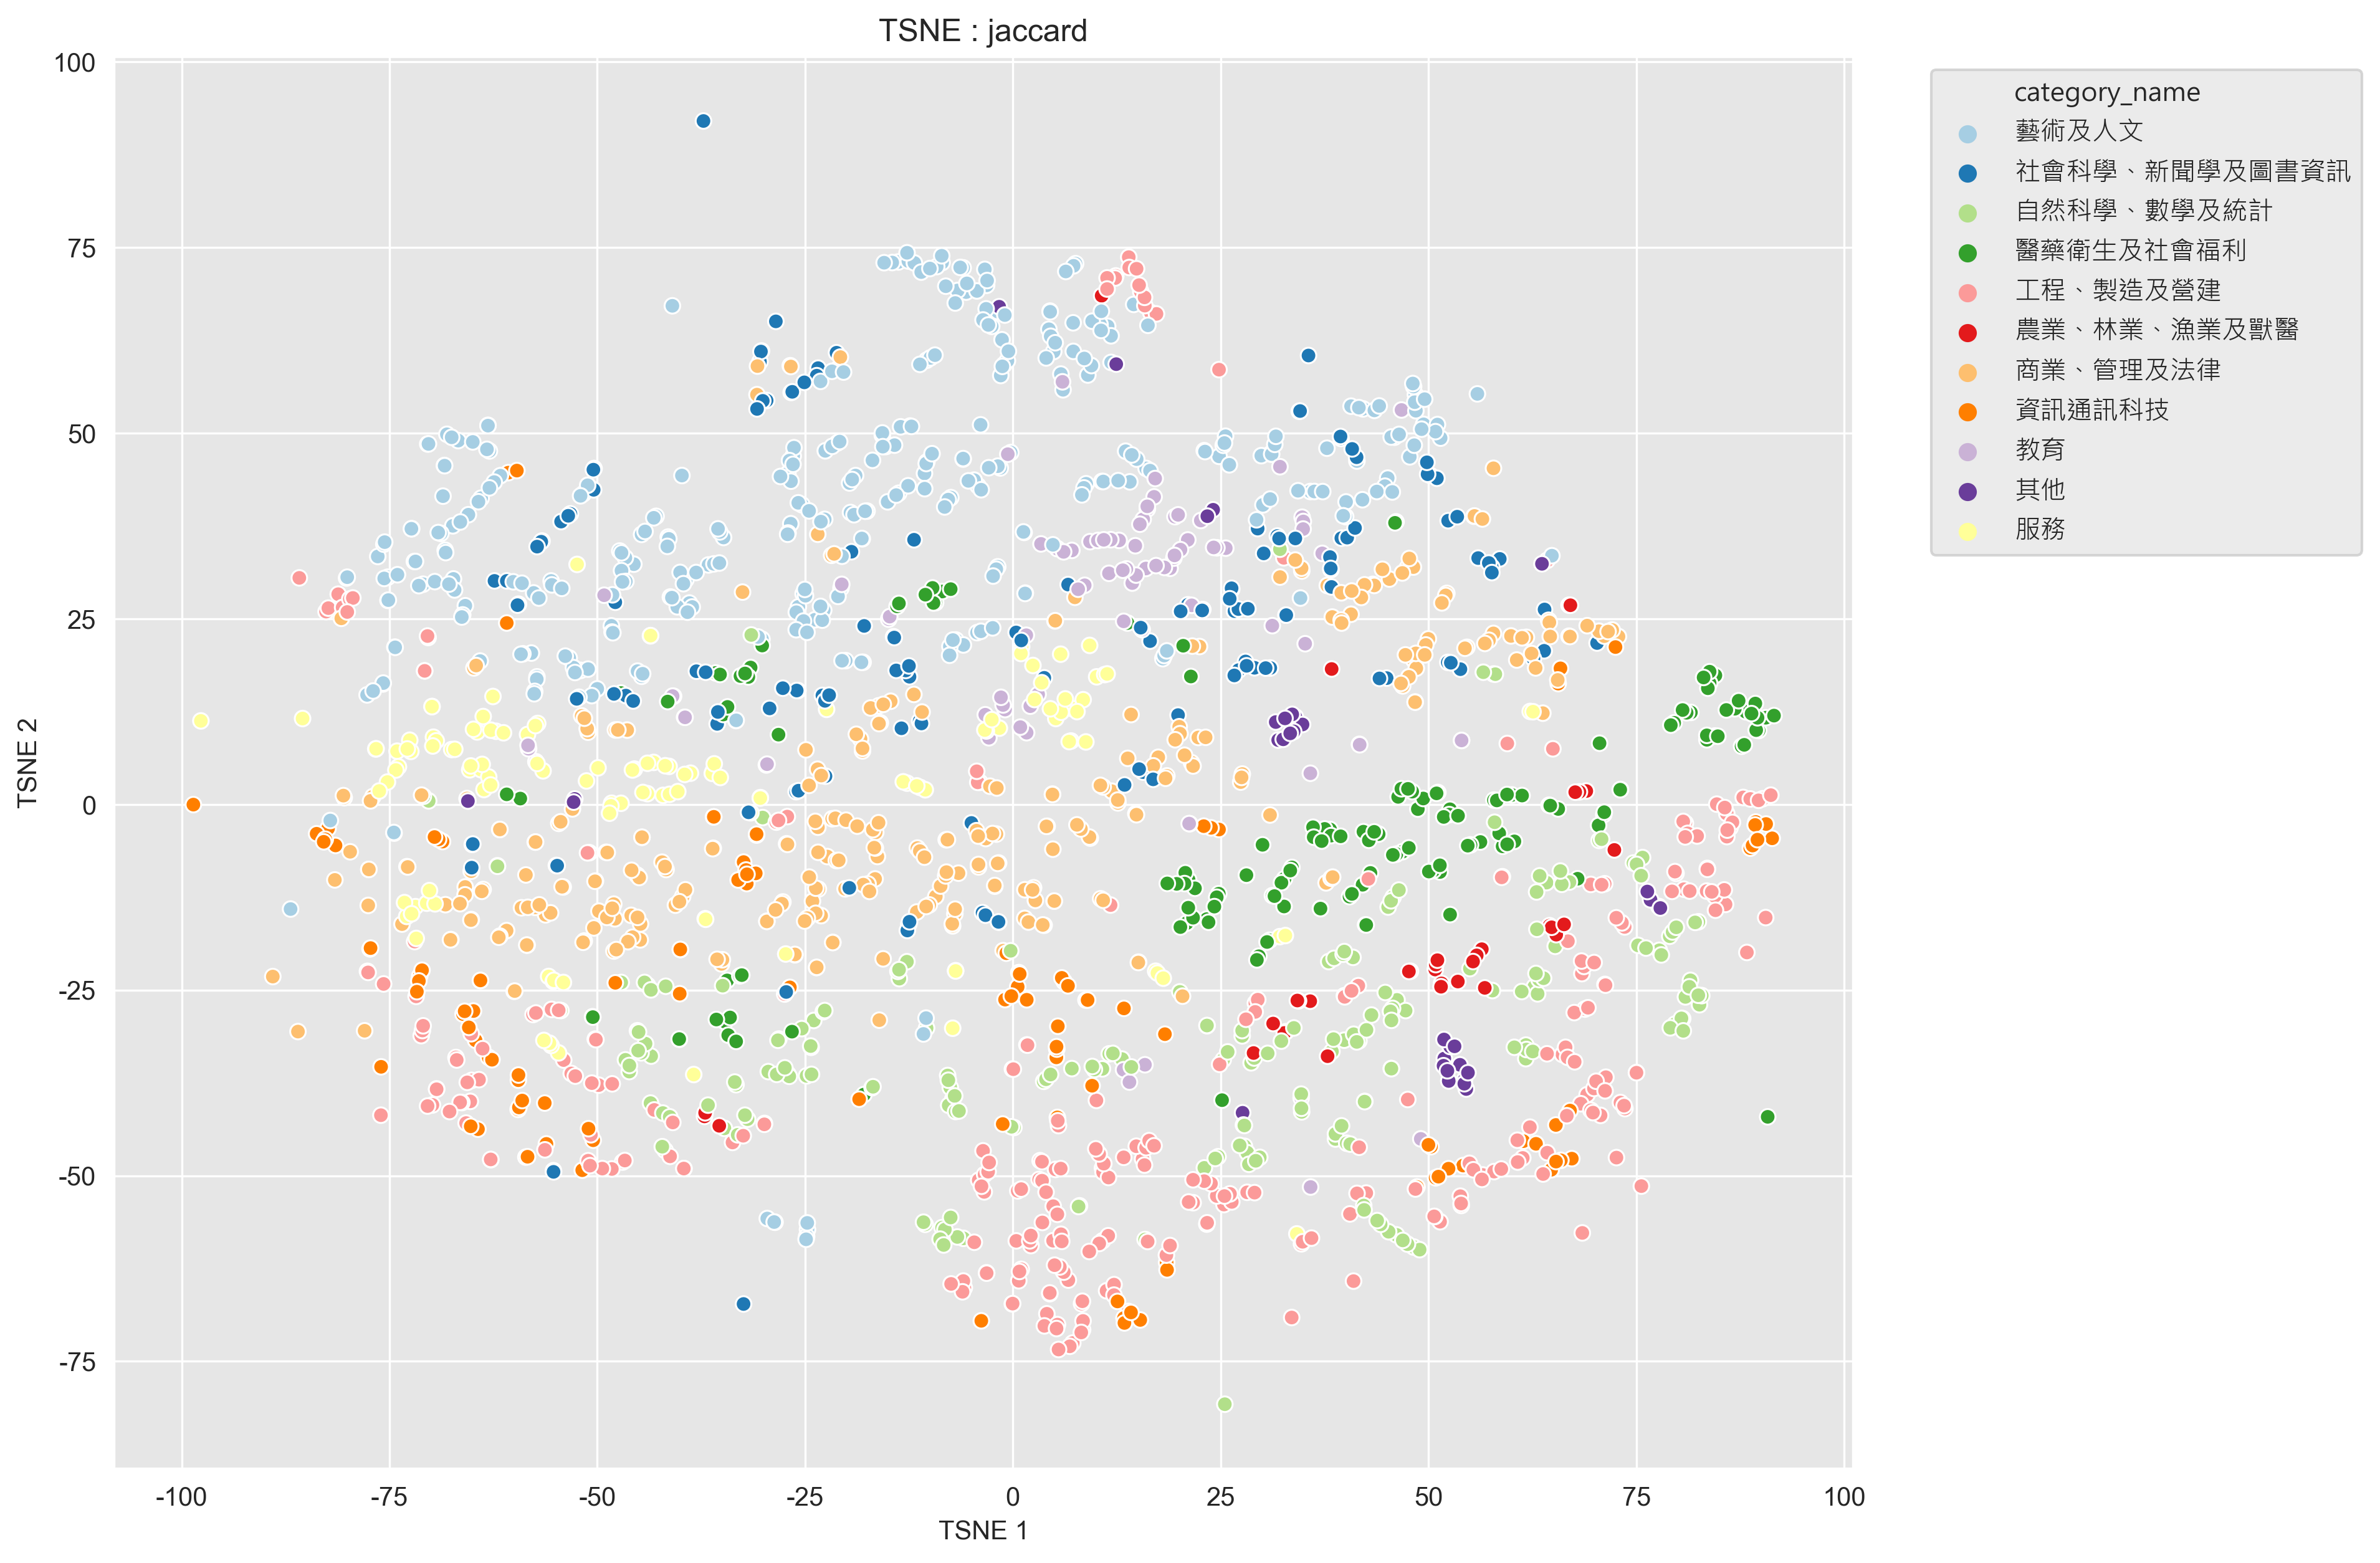

In [126]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='TSNE 1',y='TSNE 2',hue='category_name', palette="Paired",
           data=TSNEDF3)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('TSNE : jaccard')
ax.legend(prop=prop,loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

In [69]:
#case4 PCA first and then use them for the input of TSNE
pca_3 = PCA(n_components=700)
principalComponents_3 = pca_3.fit_transform(data_setindex)

In [70]:
TSNE4 = TSNE(n_components=2,metric="cosine",random_state=123,perplexity=35).fit_transform(principalComponents_3)
TSNE4.shape

(1917, 2)

In [71]:
TSNEDF4 = pd.DataFrame(data = TSNE4 , columns = ['TSNE 1', 'TSNE 2'])
TSNEDF4 = pd.concat([TSNEDF4, data[['department_id']]], axis = 1).merge(uname[['department_id','school_name','department_name','category_name']])


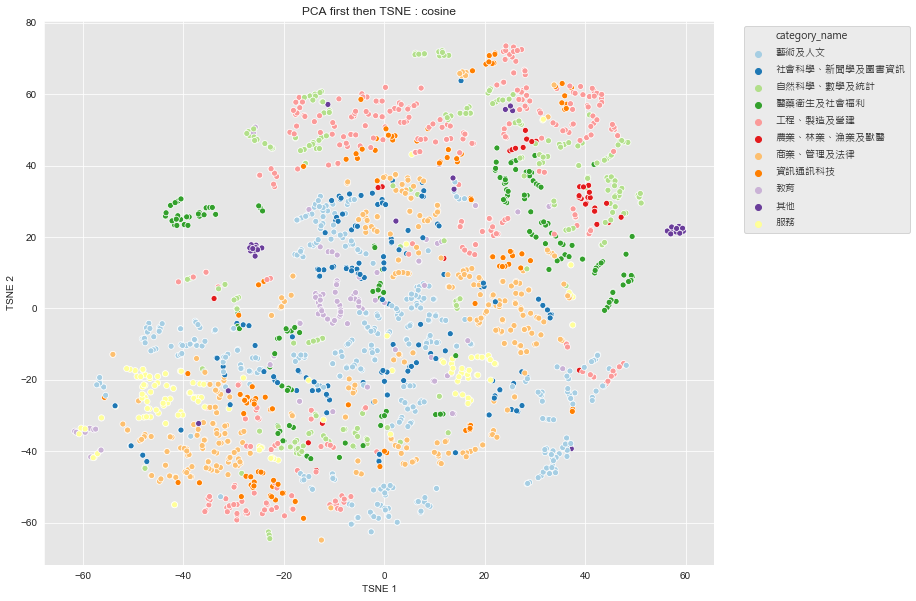

In [72]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='TSNE 1',y='TSNE 2',hue='category_name', palette="Paired",
           data=TSNEDF4)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('PCA first then TSNE : cosine')
ax.legend(prop=prop,loc='upper right',bbox_to_anchor=(1.3,1))
plt.show()

Visualize academic departments using t-SNE.

我們可以看出用t-SNE 降維視覺化 是目前所以套件模型中，表現最好的，Cosine, and Jaccard metric都能夠清楚分群出來。

而the Euclidian metric 表現不佳

另外，我自己也有嘗試先PCA 然後將其變成t-SNE 的input 也能得到良好不錯結果

### Question 3 [Refine]

我最後選擇 Visualize academic departments using t-SNE with Cosine metric

In [73]:
TSNEDF2["academic departments"]=TSNEDF2["school_name_abbr"]+TSNEDF2["department_name_abbr"]

In [74]:
TSNEDF2

TSNE 1     TSNE 2 department_id year school_id school_name  \
0    -29.854380 -59.858616        001012  106       001      國立臺灣大學   
1    -28.590296 -66.842369        001022  106       001      國立臺灣大學   
2    -30.570805 -58.899818        001032  106       001      國立臺灣大學   
3    -30.298676 -58.106831        001042  106       001      國立臺灣大學   
4    -31.837317 -58.421368        001052  106       001      國立臺灣大學   
...         ...        ...           ...  ...       ...         ...   
1912 -32.949692 -16.951771        153142  106       153      國立金門大學   
1913  -5.546673  31.392735        153152  106       153      國立金門大學   
1914   5.110542 -29.701159        153162  106       153      國立金門大學   
1915  -0.487232  22.014687        153172  106       153      國立金門大學   
1916 -31.740261 -17.058622        153182  106       153      國立金門大學   

     department_name category_id category_name school_name_abbr  \
0              中國文學系           2         藝術及人文               臺大   
1             外國語文學系           2         藝術及人文               臺大   
2               歷史學系           2         藝術及人文               臺大   
3                哲學系           2         藝術及人文               臺大   
4               人類學系           2         藝術及人文               臺大   
...              ...         ...           ...              ...   
1912            護理學系           9     醫藥衛生及社會福利               金門   
1913          長期照護學系           9     醫藥衛生及社會福利               金門   
1914          社會工作學系           9     醫藥衛生及社會福利               金門   
1915       都市計畫與景觀學系           7      工程、製造及營建               金門   
1916       護理學系(公費生)           9     醫藥衛生及社會福利               金門   

     department_name_abbr academic departments  
0                      中文                 臺大中文  
1                      外文                 臺大外文  
2                      歷史                 臺大歷史  
3                      哲學                 臺大哲學  
4                    人類學系               臺大人類學系  
...                   ...                  ...  
1912                  護理學                金門護理學  
1913                   長照                 金門長照  
1914                 社會工作               金門社會工作  
1915               都市計畫景觀             金門都市計畫景觀  
1916              護理學(公費)            金門護理學(公費)  

[1917 rows x 12 columns]

In [92]:
x=TSNEDF2['TSNE 1']
y=TSNEDF2['TSNE 2']
text=TSNEDF2['academic departments']

In [128]:
#在資料夾裡面放入微軟正黑體 讓視覺化結果可以顯示中文
import matplotlib.font_manager as mfm
font_path = "./simhei.ttf"
prop = mfm.FontProperties(fname = font_path,size=4)

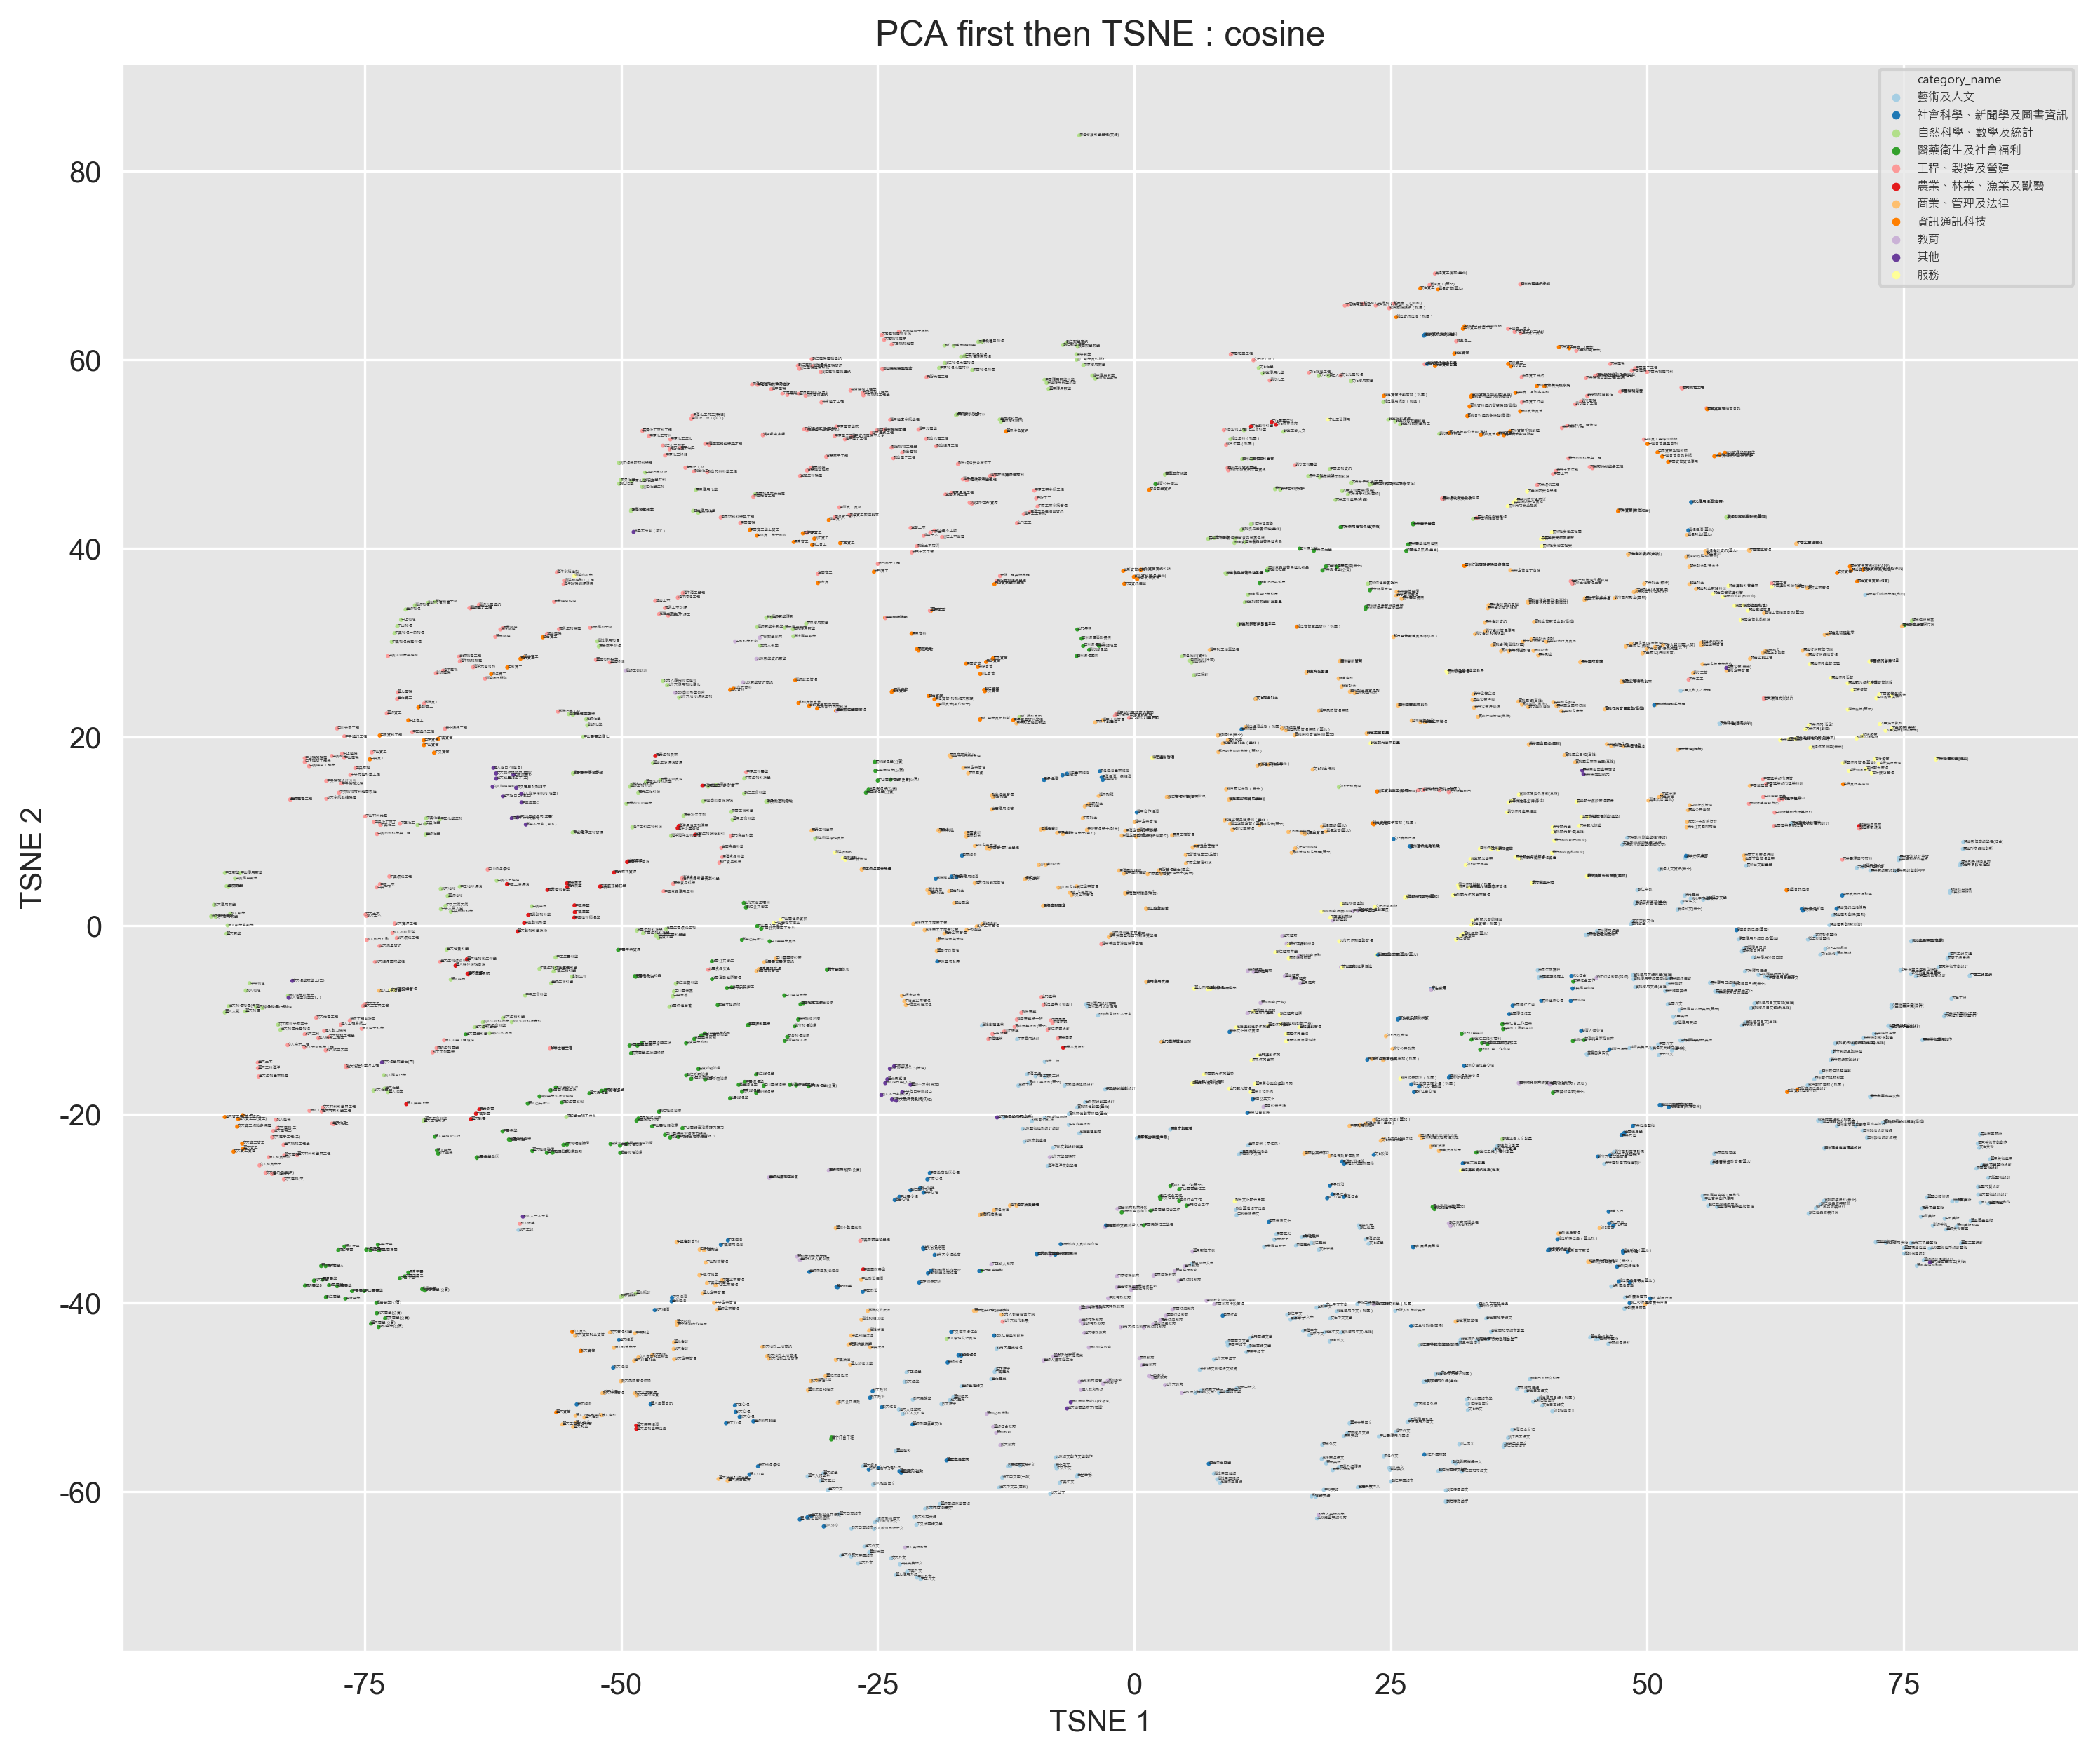

In [129]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(12,10))
ax = sns.scatterplot(x='TSNE 1',y='TSNE 2',hue='category_name', palette="Paired",s=2,linewidth=0,edgecolor="none",
           data=TSNEDF2)
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.title('PCA first then TSNE : cosine')
texts = [plt.text(x[i], y[i], text[i],fontproperties=prop,fontsize=1.3) for i in range(len(x))]  

ax.legend(prop=prop,loc='upper right',bbox_to_anchor=(1,1),markerscale=0.3,fontsize=1)
plt.rcParams['savefig.dpi'] = 300 
plt.rcParams['figure.dpi'] = 300 
#plt.savefig('hw4.png',dpi=900)  #存檔
plt.show()

為了解決overlap 我選擇將點跟字型都縮小 然後再另外輸出一個解析度很高的圖片 如此一來只要放大時 都能清楚辨識